In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import os
import random
from numpy import array
import math
from matplotlib.pyplot import scatter
%matplotlib notebook

In [2]:
def tanh(x, derivative=False):
    if (derivative == True):
        return (1 - (np.tanh(x) ** 2))
    return np.tanh(x)

def relu(x, derivative=False):
    if (derivative == True):
        return 1. * (x > 0)
    return x * (x > 0)

def sigmoid(x, derivative=False):
    sigm = 1. / (1. + np.exp(-x))
    if derivative:
        return sigm * (1. - sigm)
    return sigm
    
def activation_function(x, derivative=False):
    return relu(x, derivative)

In [3]:
class Autoencoder:
    
    def __init__(self, neuron_list, learning_rate, shrink_rate):
        self.layer_count = len(neuron_list)
        self.neuron_list = neuron_list
        self.weights = [abs(np.random.randn(y, x)) / shrink_rate for x, y in zip(neuron_list[:-1], neuron_list[1:])]
        self.activations = [np.zeros((x,1)) for x in neuron_list]
        self.deltas = [np.zeros((x,1)) for x in neuron_list]
        self.learning_rate = learning_rate
        
    def forward_propogation(self, x):
        self.activations[0] = x      
        for i in range(self.layer_count-1):
            self.activations[i+1] = activation_function(np.dot(self.weights[i], self.activations[i]))
        return self.activations[-1]
        
    def encode(self, x):
        self.activations[0] = x      
        for i in range(self.layer_count-1):
            self.activations[i+1] = activation_function(np.dot(self.weights[i], self.activations[i]))
        return self.activations[int(self.layer_count / 2)]
    
    def compute_deltas(self,output_labels):
        # Compute last layers' activations
        self.deltas[-1] = 2*activation_function(np.dot(self.weights[-1], self.activations[-2]), True)*(output_labels-self.activations[-1])       
        
        # Compute all deltas in all layers
        for l in range(self.layer_count-2, 0, -1):
            np.dot(np.dot(np.transpose(self.weights[l]),self.deltas[l+1]), np.transpose(activation_function(np.dot(self.weights[l-1], self.activations[l-1]), True)))
            
    def back_propogation(self, output_labels):
        # Compute deltas
        self.compute_deltas(output_labels)
        
        # Update weights 
        for l in range(0,self.layer_count-1):
            self.weights[l] += self.learning_rate * np.dot(self.deltas[l+1], np.transpose(self.activations[l]))

                 
    def train(self, x, y, epoch):
        error = []
        for e in range(epoch):
            pass_error = 0
            print("Epoch: " + str(e))
            for i in range(len(x)):
                estimation = self.forward_propogation(x[i])
                #print("Est: " + str(np.transpose(estimation)))
                #print("Out: " + str(np.transpose(y[i])))
                #print("")
                pass_error += 100 * np.sum( ((estimation - y[i])**2) / (y[i]**2) ) / len(estimation)
                self.back_propogation(y[i])
            error.append(pass_error / len(x))
            print("Error: " + str(pass_error/ len(x)))
        return error   
    
    def test(self, x, y):
        error = []

        pass_error = 0
        #print("Epoch: " + str(e))
        for i in range(len(x)):
            estimation = self.forward_propogation(x[i])
            #print("Est: " + str(np.transpose(estimation)))
            #print("Out: " + str(np.transpose(y[i])))
            #print("")
            pass_error += 100 * np.sum( ((estimation - y[i])*2) / (y[i]*2) ) / len(estimation)
        error.append(pass_error / len(x))
        print("Error: " + str(pass_error/ len(x)))
        return error

In [4]:
# Sample correlated data
xx = np.array([8, 20])
yy = np.array([3, 15])
means = [xx.mean(), yy.mean()]  
stds = [xx.std() / 3, yy.std() / 3]
corr = 0.5         # correlation
covs = [[stds[0]**2          , stds[0]*stds[1]*corr], 
        [stds[0]*stds[1]*corr,           stds[1]**2]] 

m = np.random.multivariate_normal(means, covs, 200).T

xx = np.array([10, 50])
yy = np.array([4, 30])
means = [xx.mean(), yy.mean()]  
stds = [xx.std() / 3, yy.std() / 3]
corr = 0.7       # correlation
covs = [[stds[0]**2          , stds[0]*stds[1]*corr], 
        [stds[0]*stds[1]*corr,           stds[1]**2]] 

m2 = np.random.multivariate_normal(means, covs, 200).T

inp = []
for i in range(200):
    a1 =  [m2[0][i],  m[1][i]]
    a2 =  [m[0][i],  m2[1][i]]
    a3 = a1 + a2
    a3 /= np.linalg.norm(a3)
    inp.append(np.transpose([a3]))

Epoch: 0
Error: 72.78981788407741
Epoch: 1
Error: 53.84860754748082
Epoch: 2
Error: 39.9138728192804
Epoch: 3
Error: 29.687462112571737
Epoch: 4
Error: 22.20453367530164
Epoch: 5
Error: 16.74841547565476
Epoch: 6
Error: 12.787153885913815
Epoch: 7
Error: 9.926234135413548
Epoch: 8
Error: 7.873357792066147
Epoch: 9
Error: 6.412208542919485
Epoch: 10
Error: 5.38291777622042
Epoch: 11
Error: 4.6675234343218275
Epoch: 12
Error: 4.179149674674317
Epoch: 13
Error: 3.8539586185667805
Epoch: 14
Error: 3.645166914003346
Epoch: 15
Error: 3.51859990006832
Epoch: 16
Error: 3.449390433739144
Epoch: 17
Error: 3.4195295622805046
Epoch: 18
Error: 3.416050874968136
Epoch: 19
Error: 3.4296860216138665
Epoch: 20
Error: 3.453870371789796
Epoch: 21
Error: 3.48400871017862
Epoch: 22
Error: 3.5169339070573846
Epoch: 23
Error: 3.5505086726101776
Epoch: 24
Error: 3.583333294222035
Epoch: 25
Error: 3.614531781817628
Epoch: 26
Error: 3.6435959389368473
Epoch: 27
Error: 3.6702721564449496
Epoch: 28
Error: 3.69447

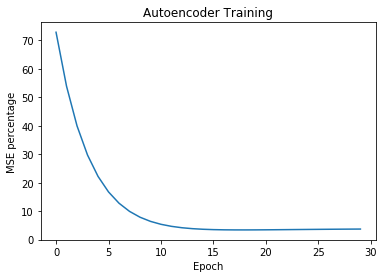

In [5]:
# Example training with correlated data
np.set_printoptions(suppress=True)
neuron_list = [4,2,4]
nn = Autoencoder(neuron_list, 0.01, 10)
err = nn.train(inp,inp, 30)
plt.plot(err)
plt.title('Autoencoder Training')
plt.xlabel('Epoch')
plt.ylabel('MSE percentage')
plt.show()